# HW2 due 5p Fri April 16 2021

You are welcome (and encouraged) to work with others, but each individual must submit their own writeup.
You can do the Group work portion in class with your classmates on Wednesdays to get full credit, but you can choose to do that portion individually and submit it along with your hw for a grade (i.e. you will not automatically get full credit). 

You are welcome to use analytical and numerical computational tools; if you do, include the **commented** sourcecode in your submission (e.g. the .ipynb file).

You are welcome to consult websites, textbooks, and other materials; if you do, include a full citation in your writeup (e.g. the .ipynb file).

**Important:** before you do any work in the Colaboratory notebook, click "File -> Save a copy in Drive ..." and rename the file to something memorable.

**Also important:** To produce a .pdf for submission to Canvas, click "File -> Print" (or press Ctrl/Cmd + P), and choose "Save to PDF" or "Microsoft Print to PDF" as your printer.


# Group work -- Wed April 14

I encourage you to attend the group work session on Wednesdays to complete the group work portion of your homework -- you will get full credit as long as you participate and make an effort on the problem. This is also a great opportunity to get to know your classmates. Only one person needs to submit.

Please note that only one person can edit the Colaboratory notebook at a time, I recommend creating a copy for yourself and copy pasting your solutions in the discord or Zoom chat if people want to work on different parts of the writeup.

## 1. Groupmates: [Names of everyone in your group]

## 2. [15 min]: Controlling a system (don't have to do if submitting individually)

Now that you've had some understanding of what types of plants (e.g., home heater) you can control, discuss a plant that you would be interested in controlling (I know many of you mentioned autonomous vehicles on the first day of class). What are the states ($x$) and inputs ($u$) of your plant? What is the desired reference of the plant and why? If there is a disturbance, what would be the ideal way you think the output should return to the desired reference? You don't have to write down everything you discussed, but please write down what plant you talked about. 

# 3. [60 min] RLC circuit interconnection

Consider the model of a series RLC circuit from lecture,
$$ L \ddot{q} + R \dot{q} + q/C = v, $$
where $q$ denotes the charge on the capacitor,
($R$, $L$, $C$) denote the (resistor, inductor, capacitor) parameters,
and $v$ denotes a series voltage source.

Now suppose that the input voltage $v$ to the circuit above is actually  the output from a second series RLC circuit

$$ L_2 C_2 \ddot{v} + R_2 C_2 \dot{v} + v = w, $$

where $v$ denotes the voltage across the second circuit's capacitor, 
($R_2$, $L_2$, $C_2$) denote the second circuit's (resistor, inductor, capacitor) parameters,
and $w$ denotes a series voltage source for the second circuit.

Let $x = (v,\dot{v})\in\mathbb{R}^2$ denote the second circuit's ***state vector*** and $u = w\in\mathbb{R}^1$ denote the second circuit's ***input vector*** (which is just a scalar since there's only one input)

a. Rewrite the second circuit's single second-order differential equation as a vector of two first-order differential equations in ***state-space*** form as $\dot{x} = f(x,u)$.

---
** SOLUTION **

Let $x(t) = [v(t), \dot{v}(t)]^\top \in \mathbb{R}^2$ and $u(t) = w(t)$. Also, let $x_i$ denote the $i^\text{th}$ entry of x. Then $\dot{x} = \cfrac{d}{dt} [v(t), \dot{v}(t)]^\top$ is given by

$$ 
\dot{x} = \left[\begin{array}{c} \dot{v} \\ \ddot{v}\end{array}\right] =
f(x,u) = \left[ \begin{array}{c} \dot{v]} \\ -\cfrac{1}{L_2 C_2}v - \cfrac{R_2}{L_2}\dot{v} + \cfrac{1}{L_2 C_2}u \end{array}\right]
$$

---

***Purpose:*** in the next two problems, you will investigate a very important algebraic property of the RLC circuit's $f$ function called ***linearity***, which we will study extensively this quarter.  In the first problem, you will show that the function is linear; in the second problem, you will determine a matrix representation for the linear function.

b. Show that the function $f:\mathbb{R}^2\times\mathbb{R}^1\rightarrow\mathbb{R}^2$ you obtained in (a.) is ***linear*** in $x$ and $u$, that is, show:

$$ f(x_1 + \alpha x_2,u_1 + \alpha u_2) = f(x_1,u_1) + \alpha f(x_2,u_2) $$

for arbitrary state vectors $x_1,x_2\in\mathbb{R}^2$, input vectors $u_1,u_2\in\mathbb{R}^1$, and scalar $\alpha\in\mathbb{R}$.

---
**SOLUTION**
First we can show that scalar multiplication of $(x,u)$ commutes with $f$,

$$ f(\alpha x, \alpha u) = \left[ \begin{array}{c} \alpha \dot{v} \\ -\alpha \cfrac{1}{L_2 C_2}v - \alpha \cfrac{R_2}{L_2}\dot{v} + \alpha\cfrac{1}{L_2 C_2}u \end{array} \right] = \alpha f(x, u) $$

Next we can show that addition of $(x, u)$ with $(x', u')$ commutes with $f$,

$$ f(x+x',u+u') = \left[ \begin{array}{c} \dot{v} + \dot{v}' \\ -\cfrac{1}{L_2 C_2}(v+v') - \alpha\cfrac{R_2}{L_2}(\dot{v}+\dot{v}') + \alpha\cfrac{1}{L_2 C_2}(u+u') \end{array}\right] = f(x,u) + f(x', u')$$

therefore,

$$ f(x+\alpha x',u+ \alpha u') = f(x,u) + f(\alpha x', \alpha u') = f(x,u) + \alpha f(x', u') $$

**Note** $(x', u')$ denotes an arbitrary element of $\mathbb{R}^2 \times \mathbb{R}$ which is unrelated to $(x,u)$, e.g. *it is not the derivative of* $(x,u)$.

---

c. Since $f$ is linear, there exist matrices $A\in\mathbb{R}^{2\times 2}$ and $B\in\mathbb{R}^{2\times 1}$ such that $f(x,u) = A x + B u$ for all state vectors $x\in\mathbb{R}^2$ and input vectors $u\in\mathbb{R}^1$ -- determine the entries in the matrices $A$, $B$.

---
** SOLUTION **

The way to find $A$ and $B$ is to look for the *coefficients* on the components of $x$ and $u$ in the equation $\dot{x} = f(x,u)$. For example, in the *first element* of $\dot{x}$, the coefficient on $v$ is $0$ and the coefficient on $\dot{v}$ is $1$. This indicates that the first *row* of $A$ should be $[0,\, 1]$.

Recall that 

$$\dot{x} = f(x,u) = \left[ \begin{array}{c} \dot{v} \\ -\cfrac{1}{L_2 C_2}v - \cfrac{R_2}{L_2}\dot{v} + \cfrac{1}{L_2 C_2}u \end{array}\right]$$

By looking for the coefficients on the entries of $x$, we find that 

$$ A = \left[ \begin{array}{cc} 0 & 1 \\ -\cfrac{1}{L_2 C_2} & -\cfrac{R_2}{L_2} \end{array}\right]$$

likewise, by looking for the coefficients on $u$, we find that 

$$ B = \left[ \begin{array}{c} 0 \\ \cfrac{1}{L_2 C_2} \end{array}\right] $$

so that 

$$ f(x,u) = \left[ \begin{array}{c} \dot{v} \\ -\cfrac{1}{L_2 C_2}v - \cfrac{R_2}{L_2}\dot{v} + \cfrac{1}{L_2 C_2}u \end{array}\right] = \left[ \begin{array}{cc} 0 & 1 \\ -\cfrac{1}{L_2 C_2} & -\cfrac{R_2}{L_2} \end{array}\right] \left[\begin{array}{c}v \\ \dot{v}\end{array} \right] + \left[ \begin{array}{c} 0 \\ \cfrac{1}{L_2 C_2} \end{array}\right]u$$

which clearly satisfies $$\dot{x} = Ax + Bu$$.

---



### * end of group work -- download as PDF and submit as part of group assignment *

# 0. [preferred name]; [preferred pronouns]

a. Approximately how many hours did you spend on this assignment?

b. Were there specific problems that took much longer than others?

c. What class meeting(s) did you participate in this week?

d. What timezone(s) were you working in this week?

# 1. RLC circuit interconnection (cont.)

This problem is a continuation of **3. RLC circuit interconnection** in the group work portion. Use the $f, x, u$, and the two RLC circuits described in that group work problem to solve the problems below.

***Purpose:*** in the next problems, you will see how interconnecting two subsystems affects the different mathematical representations we use in this class; in particular, it will highlight strengths of the block diagram and state-space representations.

d. Determine the transfer functions for the first circuit $P_1(s)$ treating $v$ as the input and $q$ as the output and for the second circuit $P_2(s)$ treating $w$ as the input and $v$ as the output.

**Solution** 

$P_1(s) = G_{qv}(s)$

$L\ddot{q} + R\dot{q} + q/c = v$

Laplace transform to obtain $s^2Lq+sRq+q/c = v$

$(s^2L+sR+1/c)q=v$

$ \Leftrightarrow \fbox{$G_{qv} = \frac{q}{v}=\frac{1}{Ls^2+Rs+1/C}=\frac{C}{LCs^2+RCs+1}$}$

Similarly, $P_2(s) = G_{vw}(s)$,
where $\fbox{$G_{vw} = \frac{v}{w}=\frac{1}{L_2C_2s^2+R_2C_2s+1}$}$

-------------------------------------------

e. Draw and label a block diagram with two blocks (representing the first circuit, $P_1$, and the second circuit, $P_2$) and three arrows (representing the second circuit's input voltage $w$, the second circuit's output / first circuit's input voltage $v$, and the first circuit's output charge $q$).

**Solution**

$w \rightarrow \fbox{$P_2$} \xrightarrow{v} \fbox{$P_1$} \rightarrow q$

-------------------------------------------

f. Determine the transfer function from $w$ to $q$.  (***Hint:*** it may help to apply block diagram algebra.)

**Solution**

We know from block diagram above that 

$v=P_2 w$

$q=P_1 v$

Substitute to obtain:

$q=P_1 v = P_1 P_2 w = \frac{C}{(LCs^2+RCs+1)(L_2 C_2s^2+R_2C_2s + 1)}w $

$\Leftrightarrow G_{qw} = \frac{q}{w} = \frac{C}{(LCs^2+RCs+1)(L_2 C_2s^2+R_2C_2s + 1)}$

$\Leftrightarrow \fbox{$G_{qw} = \frac{C}{(LCL_2C_2)s^4 + (LCR_2C_2+RCL_2C_2)s^3 + (LC + C_2L_2 + RCR_2C_2)s^2 + (RC + R_2C_2)s + 1}$}$

------------------------------------------------------

g. Determine the fourth-order differential equation that relates input $w$ to output $q$.  (***Hint:*** you can use your answer from (e.), or you can substitute the second circuit's DE into the first circuit's DE -- both strategies will give the same answer, so use whichever makes the most sense to you.)

**Solution:**

Using the answer for (f.),

$G_{qw} = \frac{q}{w} = \frac{C}{(LCL_2C_2)s^4 + (LCR_2C_2+RCL_2C_2)s^3 + (LC + C_2L_2 + RCR_2C_2)s^2 + (RC + R_2C_2)s + 1}$

$\Leftrightarrow \fbox{$(LCL_2C_2)\ddddot{q} + (LCR_2C_2+RCL_2C_2)\dddot{q} + (LC + C_2L_2 + RCR_2C_2)\ddot{q} + (RC + R_2C_2)\dot{q} + q = C w$}$

-----------------------------------------------------

h. Letting $x = (q,\dot{q},v,\dot{v})\in\mathbb{R}^4$ denote the state vector for the interconnected circuits and $u = w\in\mathbb{R}^1$ denote the input vector, determine the function $f:\mathbb{R}^4\times\mathbb{R}^1\rightarrow\mathbb{R}^4$ for which $\dot{x} = f(x,u)$.

**Solution:**

With $x = (q,\dot{q},v,\dot{v})$,we get,


$\fbox{$\dot{x} = (\dot{q},\ddot{q},\dot{v},\ddot{v}) = \left[\begin{array}{c} \dot{q} \\ -\frac{R}{L}\dot{q}-\frac{1}{LC}q+\frac{1}{L}v \\ \dot{v} \\ -\frac{R_2}{L_2}\dot{v}-\frac{1}{L_2C_2}v+\frac{1}{L_2C_2}w \end{array}\right] $}$

-------------------------------------------------------

***Reflect:*** which of the 4 representations for the interconnected circuits in (e.--h.) was easiest to work with?  most intuitive?  easiest to generalize to additional interconnected circuits?

i. Noting that the function $f:\mathbb{R}^4\times\mathbb{R}^1\rightarrow\mathbb{R}^4$ from (h.) is linear, determine matrices $A\in\mathbb{R}^{4\times4}$, $B\in\mathbb{R}^{4\times1}$ such that $f(x,u) = A x + B u$.

**Solution**

$\fbox{$\dot{x} = \left[\begin{array}{c} \dot{q} \\ \ddot{q} \\ \dot{v} \\ \ddot{v} \end{array}\right] = \left[\begin{array}{c} 0 & 1 & 0 & 0 \\ \frac{-1}{LC} & \frac{-R}{L} &  \frac{1}{L} & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & \frac{-1}{L_2C_2} & \frac{-R_2}{L_2} \end{array}\right] \left[\begin{array}{c} q \\ \dot{q} \\ v \\ \dot{v} \end{array}\right] + \left[\begin{array}{c} 0 \\ 0 \\ 0 \\ \frac{1}{L_2C_2} \end{array}\right] w$}$

-------------------------------------------------------


# 2. phase portraits of linear systems

***Purpose:*** gain greater understanding of the dynamics of linear systems using computational tools and visualizations.

In each of the following problems, you will create a ***phase portrait*** of a linear system with a $2$-dimensional state vector in the form $\dot{x} = A x$.  To create a phase portrait, plot the system's ***vector field*** and overlay several simulated trajectories to illustrate the system's dynamics.  You may find it helpful to edit the simulation and plotting code used in the phase portrait in Section 2 of the [lecture examples notebook](https://colab.research.google.com/github/sburden/447/blob/master/447_lec_examples.ipynb), or to consult Chapter 5.2 in [AMv2](http://www.cds.caltech.edu/~murray/amwiki/index.php/Second_Edition).

a. Create a phase portrait for $\dot{x} = A_1 x$ where $A_1 = \left[\begin{matrix} -1 & 0 \\ 0 & -2 \end{matrix}\right]$.

b. Create a phase portrait for $\dot{x} = A_2 x$ where $A_2 = \left[\begin{matrix} -1 & 1 \\ 0 & -1 \end{matrix}\right]$.

c. Create a phase portrait for $\dot{x} = A_3 x$ where $A_3 = \left[\begin{matrix} -1 & 0 \\ 0 & +2 \end{matrix}\right]$.

d. Create a phase portrait for $\dot{x} = A_4 x$ where $A_4 = \left[\begin{matrix} -1 & \pi \\ -\pi & -1 \end{matrix}\right]$.

e. Create a phase portrait for $\dot{x} = A_5 x$ where $A_5 = \left[\begin{matrix} 0 & \pi \\ -\pi & 0 \end{matrix}\right]$.

f. Create a phase portrait for $\dot{z} = T(\theta) A_3 T(\theta)^{-1} z$ where $T(\theta) = \left[\begin{matrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{matrix}\right]$ and $A_3$ is from (c.) -- show the result from several values of $\theta$, and explain in words how the phase portraits are related.  (***Note:*** the state $z$ is related to the state $x$ via the linear transformation $z = T(\theta) x$.)

g. Create a phase portrait for $\dot{z} = S A_3 S^{-1} z$ where $S = \left[\begin{matrix} 1 & 2 \\ 3 & 4 \end{matrix}\right]$ and $A_3$ is from (c.), and overlay eigenvectors of $S$ -- explain in words how the phase portraits are related.

***Takeaway:***  it may be hard to believe, but the preceding problems demonstrate the full range of dynamics that linear systems can exhibit.  Although we will often work with systems whose state space is much higher-dimensional, we can understand the dynamics of such systems by visualizing 2-dimensional "slices" of state space as above.

In [2]:
# import modules first
import numpy as np
import pylab as plt

# build ODE solver
def numerical_simulation(f,t,x,t0=0.,dt=1e-4,ut=None,ux=None,utx=None,return_u=False):
  """
  simulate x' = f(x,u) 

  input:
    f : R x X x U --> X - vector field
      X - state space (must be vector space)
      U - control input set
    t - scalar - final simulation time
    x - initial condition; element of X

    (optional:)
    t0 - scalar - initial simulation time
    dt - scalar - stepsize parameter
    return_u - bool - whether to return u_

    (only one of:)
    ut : R --> U
    ux : X --> U
    utx : R x X --> U

  output:
    t_ - N array - time trajectory
    x_ - N x X array - state trajectory
    (if return_u:)
    u_ - N x U array - state trajectory
  """
  t_,x_,u_ = [t0],[x],[]
  
  inputs = sum([1 if u is not None else 0 for u in [ut,ux,utx]])
  assert inputs <= 1, "more than one of ut,ux,utx defined"

  if inputs == 0:
    assert not return_u, "no input supplied"
  else:
    if ut is not None:
      u = lambda t,x : ut(t)
    elif ux is not None:
      u = lambda t,x : ux(x)
    elif utx is not None:
      u = lambda t,x : utx(t,x)

  while t_[-1]+dt < t:
    if inputs == 0:
      _t,_x = t_[-1],x_[-1]
      dx = f(t_[-1],x_[-1]) * dt
    else:
      _t,_x,_u = t_[-1],x_[-1],u(t_[-1],x_[-1])
      dx = f(_t,_x,_u) * dt
      u_.append( _u )

    x_.append( _x + dx )
    t_.append( _t + dt )

  if return_u:
    return np.asarray(t_),np.asarray(x_),np.asarray(u_)
  else:
    return np.asarray(t_),np.asarray(x_)
    

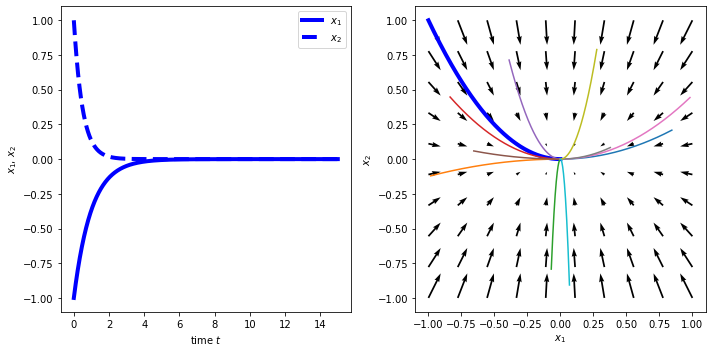

In [3]:

# code for a.
A = np.array([[-1,0], 
     [0,-2]])

def f(t,x,u):
    x1,x2 = x # charge, current
    return np.dot(x,A.T)

plt.figure(figsize=(10,5))
dt = 1e-2
# initial condition
x10,x20 = (-1.,1.)
x0 = np.array([x10,x20])

# simulation time−−
t = 15

t_,x_ = numerical_simulation(f,t,x0,dt=dt,ut=lambda t : 0)
q_,dq_ = x_[:,0],x_[:,1]

# state vs time
ax = plt.subplot(1,2,1)
ax.set_xlabel(r'time $t$')
ax.set_ylabel(r'$x_1$, $x_2$')
plt.plot(t_,q_,'b',lw=4,label='$x_1$')
plt.plot(t_,dq_,'b--',lw=4,label='$x_2$')
plt.legend()

# phase portrait / "quiver" plot
ax = plt.subplot(1,2,2)
Q, Qd = np.meshgrid(np.linspace(-1,+1, 10), np.linspace(-1, +1, 10))
dQ,dQd = np.asarray([f(0.,(q,dq),0.).flatten() for q,dq in zip(Q.flatten(),Qd.flatten())]).T
dQ,dQd = dQ.reshape(dQ.shape),dQd.reshape(Qd.shape)
ax.quiver(Q,Qd,dQ,dQd)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.plot(q_,dq_,'b',lw=4)

for _ in range(10):
  # random initial condition in [-1,+1] x [-1,+1] square
  x0 = 2*(np.random.rand(2) - .5)
  t_,x_ = numerical_simulation(f,t,x0,dt=dt,ut=lambda t : 0)
  q_,dq_ = x_[:,0],x_[:,1]
  ax.plot(q_,dq_)
  

plt.tight_layout()

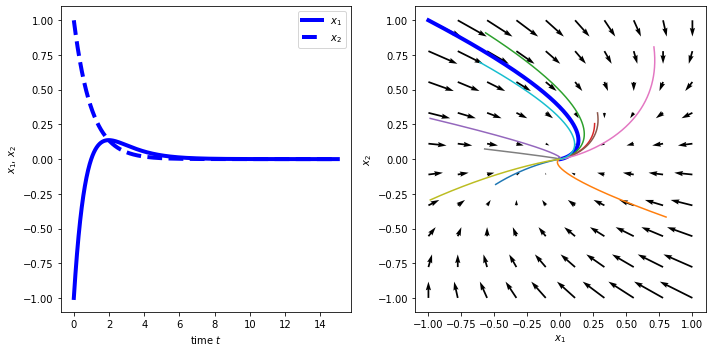

In [4]:
# code for b
A = np.array([[-1,1], 
     [0,-1]])

def f(t,x,u):
    x1,x2 = x # charge, current
    return np.dot(x,A.T)
  
plt.figure(figsize=(10,5))
dt = 1e-2
# initial condition
x10,x20 = (-1.,1.)
x0 = np.array([x10,x20])

# simulation time
t = 15

t_,x_ = numerical_simulation(f,t,x0,dt=dt,ut=lambda t : 0)
q_,dq_ = x_[:,0],x_[:,1]

# state vs time
ax = plt.subplot(1,2,1)
ax.set_xlabel(r'time $t$')
ax.set_ylabel(r'$x_1$, $x_2$')
plt.plot(t_,q_,'b',lw=4,label='$x_1$')
plt.plot(t_,dq_,'b--',lw=4,label='$x_2$')
plt.legend()

# phase portrait / "quiver" plot
ax = plt.subplot(1,2,2)
Q, Qd = np.meshgrid(np.linspace(-1,+1, 10), np.linspace(-1, +1, 10))
dQ,dQd = np.asarray([f(0.,(q,dq),0.).flatten() for q,dq in zip(Q.flatten(),Qd.flatten())]).T
dQ,dQd = dQ.reshape(dQ.shape),dQd.reshape(Qd.shape)
ax.quiver(Q,Qd,dQ,dQd)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.plot(q_,dq_,'b',lw=4)

for _ in range(10):
  # random initial condition in [-1,+1] x [-1,+1] square
  x0 = 2*(np.random.rand(2) - .5)
  t_,x_ = numerical_simulation(f,t,x0,dt=dt,ut=lambda t : 0)
  q_,dq_ = x_[:,0],x_[:,1]
  ax.plot(q_,dq_)
  

plt.tight_layout()

eigen values
[-1.  2.]
eigen vectors
[[1. 0.]
 [0. 1.]]


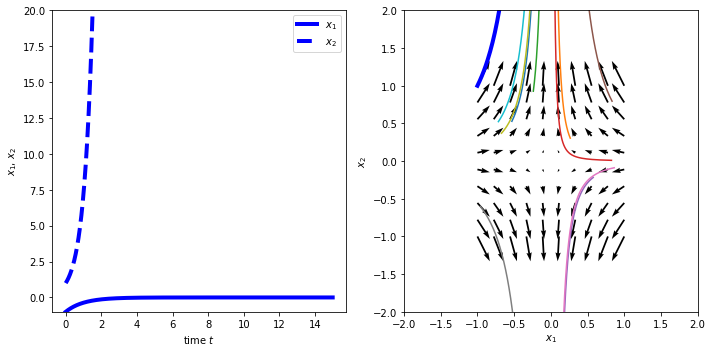

In [5]:
# code for c.
A = np.array([[-1,0], 
     [0,+2]])

w,v = np.linalg.eig(A)
print('eigen values')
print(w)
print('eigen vectors')
print(v)

def f(t,x,u):
    x1,x2 = x # charge, current
    return np.dot(x,A.T)
  
plt.figure(figsize=(10,5))
dt = 1e-2
# initial condition
x10,x20 = (-1.,1.)
x0 = np.array([x10,x20])

# simulation time
t = 15

t_,x_ = numerical_simulation(f,t,x0,dt=dt,ut=lambda t : 0)
q_,dq_ = x_[:,0],x_[:,1]

# state vs time
ax = plt.subplot(1,2,1)
ax.set_xlabel(r'time $t$')
ax.set_ylabel(r'$x_1$, $x_2$')
plt.plot(t_,q_,'b',lw=4,label='$x_1$')
plt.plot(t_,dq_,'b--',lw=4,label='$x_2$')
plt.ylim((-1,20))
plt.legend()

# phase portrait / "quiver" plot
ax = plt.subplot(1,2,2)
Q, Qd = np.meshgrid(np.linspace(-1,+1, 10), np.linspace(-1, +1, 10))
dQ,dQd = np.asarray([f(0.,(q,dq),0.).flatten() for q,dq in zip(Q.flatten(),Qd.flatten())]).T
dQ,dQd = dQ.reshape(dQ.shape),dQd.reshape(Qd.shape)
ax.quiver(Q,Qd,dQ,dQd)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_xlim((-2,2))
ax.set_ylim((-2,2))
ax.plot(q_,dq_,'b',lw=4)

for _ in range(10):
  # random initial condition in [-1,+1] x [-1,+1] square
  x0 = 2*(np.random.rand(2) - .5)
  t_,x_ = numerical_simulation(f,t,x0,dt=dt,ut=lambda t : 0)
  q_,dq_ = x_[:,0],x_[:,1]
  ax.plot(q_,dq_)
  

plt.tight_layout()

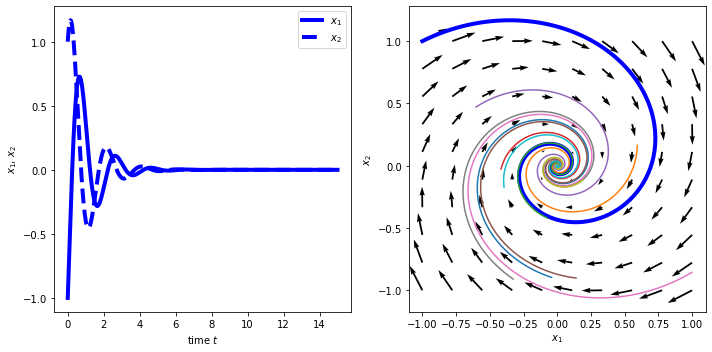

In [6]:
# code for d.
A = np.array([[-1,np.pi], 
     [-np.pi,-1]])

def f(t,x,u):
    x1,x2 = x # charge, current
    return np.dot(x,A.T)
  
plt.figure(figsize=(10,5))
dt = 1e-2
# initial condition
x10,x20 = (-1.,1.)
x0 = np.array([x10,x20])

# simulation time
t = 15

t_,x_ = numerical_simulation(f,t,x0,dt=dt,ut=lambda t : 0)
q_,dq_ = x_[:,0],x_[:,1]

# state vs time
ax = plt.subplot(1,2,1)
ax.set_xlabel(r'time $t$')
ax.set_ylabel(r'$x_1$, $x_2$')
plt.plot(t_,q_,'b',lw=4,label='$x_1$')
plt.plot(t_,dq_,'b--',lw=4,label='$x_2$')
plt.legend()

# phase portrait / "quiver" plot
ax = plt.subplot(1,2,2)
Q, Qd = np.meshgrid(np.linspace(-1,+1, 10), np.linspace(-1, +1, 10))
dQ,dQd = np.asarray([f(0.,(q,dq),0.).flatten() for q,dq in zip(Q.flatten(),Qd.flatten())]).T
dQ,dQd = dQ.reshape(dQ.shape),dQd.reshape(Qd.shape)
ax.quiver(Q,Qd,dQ,dQd)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.plot(q_,dq_,'b',lw=4)

for _ in range(10):
  # random initial condition in [-1,+1] x [-1,+1] square
  x0 = 2*(np.random.rand(2) - .5)
  t_,x_ = numerical_simulation(f,t,x0,dt=dt,ut=lambda t : 0)
  q_,dq_ = x_[:,0],x_[:,1]
  ax.plot(q_,dq_)
  

plt.tight_layout()

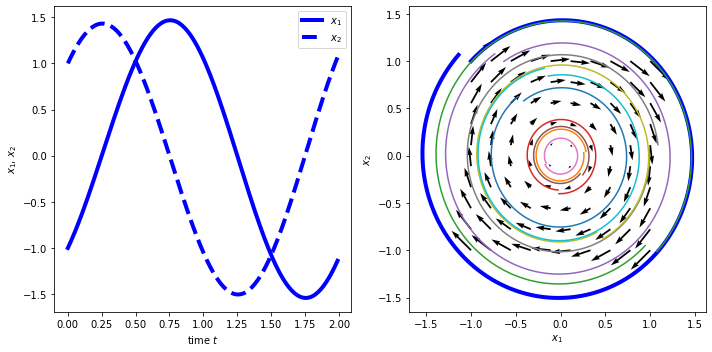

In [7]:
# code for e.
A = np.array([[0,np.pi], 
     [-np.pi,0]])

def f(t,x,u):
    x1,x2 = x # charge, current
    return np.dot(x,A.T)
  
plt.figure(figsize=(10,5))
dt = 1e-2
# initial condition￼
x10,x20 = (-1.,1.)
x0 = np.array([x10,x20])

# simulation time
t = 2

t_,x_ = numerical_simulation(f,t,x0,dt=dt,ut=lambda t : 0)
q_,dq_ = x_[:,0],x_[:,1]

# state vs time
ax = plt.subplot(1,2,1)
ax.set_xlabel(r'time $t$')
ax.set_ylabel(r'$x_1$, $x_2$')
plt.plot(t_,q_,'b',lw=4,label='$x_1$')
plt.plot(t_,dq_,'b--',lw=4,label='$x_2$')
plt.legend()

# phase portrait / "quiver" plot
ax = plt.subplot(1,2,2)
Q, Qd = np.meshgrid(np.linspace(-1,+1, 10), np.linspace(-1, +1, 10))
dQ,dQd = np.asarray([f(0.,(q,dq),0.).flatten() for q,dq in zip(Q.flatten(),Qd.flatten())]).T
dQ,dQd = dQ.reshape(dQ.shape),dQd.reshape(Qd.shape)
ax.quiver(Q,Qd,dQ,dQd)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.plot(q_,dq_,'b',lw=4)

for _ in range(10):
  # random initial condition in [-1,+1] x [-1,+1] square
  x0 = 2*(np.random.rand(2) - .5)
  t_,x_ = numerical_simulation(f,t,x0,dt=dt,ut=lambda t : 0)
  q_,dq_ = x_[:,0],x_[:,1]
  ax.plot(q_,dq_)
  

plt.tight_layout()

[-1.  2.]
[-1.  2.]
[ 2. -1.]
[ 2. -1.]
[-1.  2.]
[-1.  2.]
[ 2. -1.]
[ 2. -1.]
[-1.  2.]


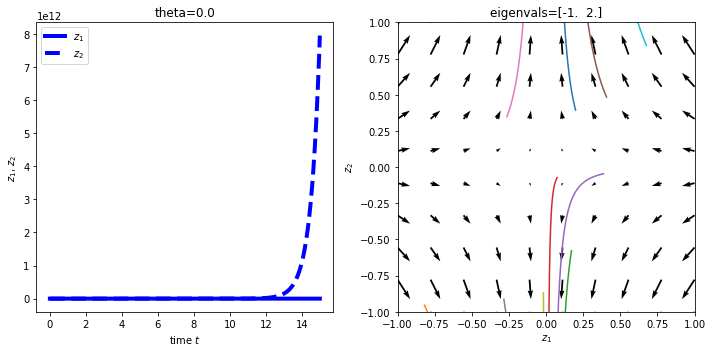

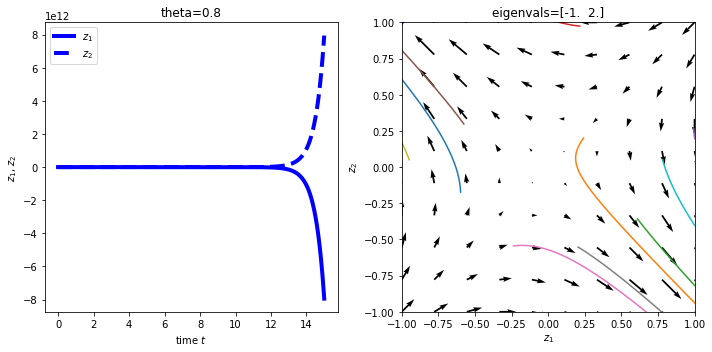

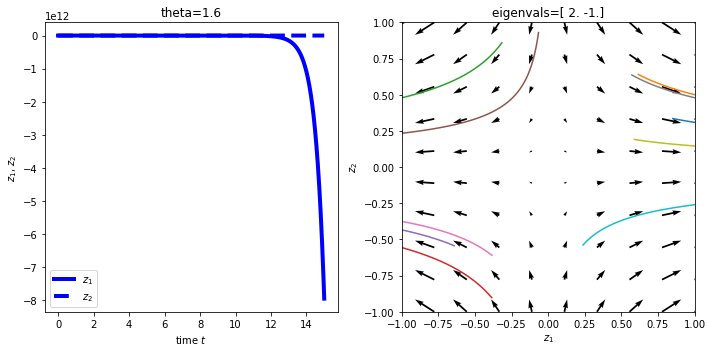

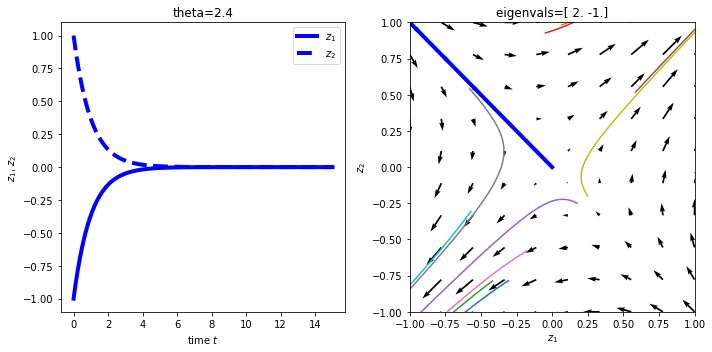

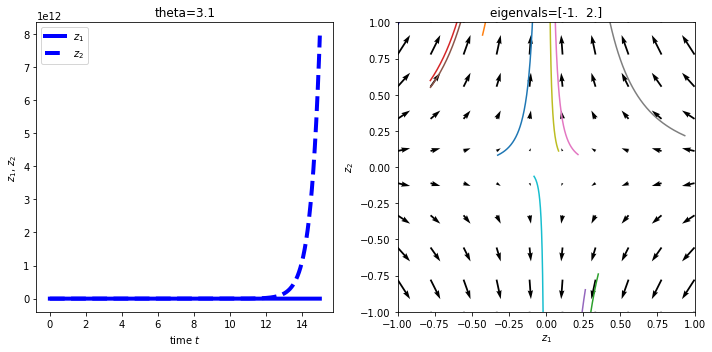

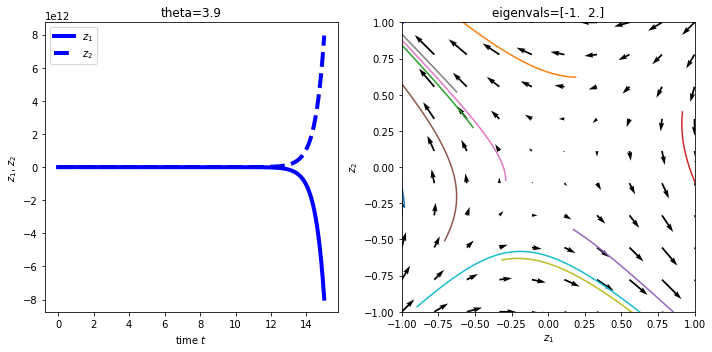

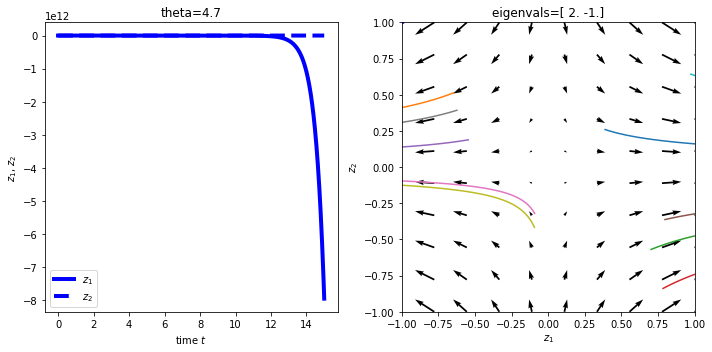

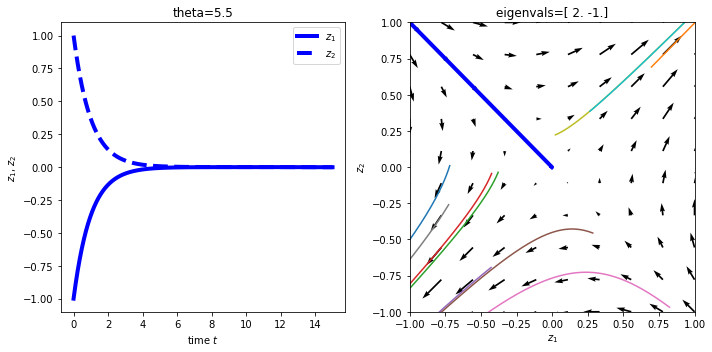

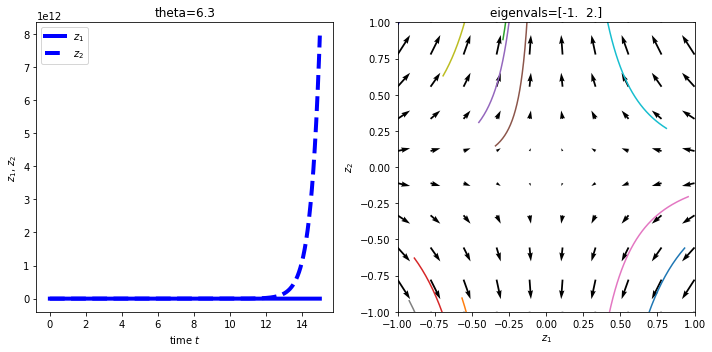

In [8]:
# code for f.
A3 = np.array([[-1,0], 
     [0,+2]])
thetas = np.linspace(0,2*np.pi,9)# [0,np.pi/2,np.pi,3/2*np.pi]

#T = np.array([[np.cos(thetas),-np.sin(thetas)],[np.sin(thetas),np.cos(thetas)]])

for theta in thetas:
  def f(t,z,u):
      z1,z2 = z # charge, current
#       theta=0
      T = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
      return np.squeeze((np.matmul(np.matmul(np.matmul(T,A3),np.linalg.inv(T)),np.reshape(z,(2,1)))))

  plt.figure(figsize=(10,5))
  
  dt = 1e-2
  # initial condition
  z10,z20 = (-1.,1.)
  z0 = np.array([z10,z20])

  # simulation time
  t = 15
  t_,z_ = numerical_simulation(f,t,z0,dt=dt,ut=lambda t : 0)
  q_,dq_ = z_[:,0],z_[:,1]

  # print eigenvalues
  T = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
  A_ = np.matmul(np.matmul(T,A3),np.linalg.inv(T))
  w,_ = np.linalg.eig(A_)  
  print(w)
  
  # state vs time
  ax = plt.subplot(1,2,1)
  ax.set_xlabel(r'time $t$')
  ax.set_ylabel(r'$z_1$, $z_2$')
  plt.plot(t_,q_,'b',lw=4,label='$z_1$')
  plt.plot(t_,dq_,'b--',lw=4,label='$z_2$')
  plt.title('theta=%1.1f'% theta)
  plt.legend()

  # phase portrait / "quiver" plot
  ax = plt.subplot(1,2,2)
  Q, Qd = np.meshgrid(np.linspace(-1,+1, 10), np.linspace(-1, +1, 10))
  dQ,dQd = np.asarray([f(0.,(q,dq),0.).flatten() for q,dq in zip(Q.flatten(),Qd.flatten())]).T
  dQ,dQd = dQ.reshape(dQ.shape),dQd.reshape(Qd.shape)
  ax.quiver(Q,Qd,dQ,dQd)
  ax.set_xlabel(r'$z_1$')
  ax.set_ylabel(r'$z_2$')
  ax.set_xlim((-1,1))
  ax.set_ylim((-1,1))
  plt.title('eigenvals='+str(w))
  ax.plot(q_,dq_,'b',lw=4)

  for _ in range(10):
    # random initial condition in [-1,+1] x [-1,+1] square
    x0 = 2*(np.random.rand(2) - .5)
    t_,x_ = numerical_simulation(f,t,x0,dt=dt,ut=lambda t : 0)
    q_,dq_ = x_[:,0],x_[:,1]
    ax.plot(q_,dq_)


  plt.tight_layout()

[-0.37228132  5.37228132]
[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


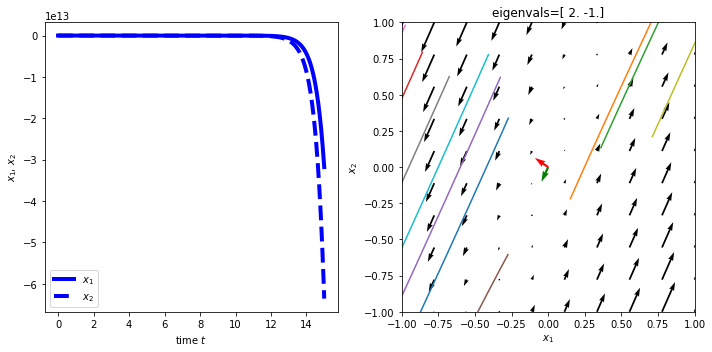

In [9]:
# code for g.
A = np.array([[-1,0], 
     [0,+2]])
S = np.array([[1,2],[3,4]])
def f(t,x,u):
    x1,x2 = x 
    return np.squeeze((np.matmul(np.matmul(np.matmul(S,A),np.linalg.inv(S)),np.reshape(x,(2,1)))))
  
plt.figure(figsize=(10,5))
dt = 1e-2
# initial condition
x10,x20 = (-1.,1.)
x0 = np.array([x10,x20])
# simulation time
t = 15

t_,x_ = numerical_simulation(f,t,x0,dt=dt,ut=lambda t : 0)
q_,dq_ = x_[:,0],x_[:,1]

# state vs time
ax = plt.subplot(1,2,1)
ax.set_xlabel(r'time $t$')
ax.set_ylabel(r'$x_1$, $x_2$')
plt.plot(t_,q_,'b',lw=4,label='$x_1$')
plt.plot(t_,dq_,'b--',lw=4,label='$x_2$')
plt.legend()

# calculate eigenvectors of S
w,v = np.linalg.eig(S)
print(w)
print(v)

# phase portrait / "quiver" plot
ax = plt.subplot(1,2,2)
Q, Qd = np.meshgrid(np.linspace(-1,+1, 10), np.linspace(-1, +1, 10))
dQ,dQd = np.asarray([f(0.,(q,dq),0.).flatten() for q,dq in zip(Q.flatten(),Qd.flatten())]).T
dQ,dQd = dQ.reshape(dQ.shape),dQd.reshape(Qd.shape)
ax.quiver(Q,Qd,dQ,dQd)

A_ = np.matmul(np.matmul(S,A),np.linalg.inv(S))
ax.quiver([0,0], [0,0], v[0,:],v[1,:],color=['r','g']) # include eigenvectors of S to quiver plot
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_xlim((-1,1))
ax.set_ylim((-1,1))
w,v = np.linalg.eig(A_)
plt.title('eigenvals='+str(w))
ax.plot(q_,dq_,'b',lw=4)

for _ in range(10):
  # random initial condition in [-1,+1] x [-1,+1] square
  x0 = 2*(np.random.rand(2) - .5)
  t_,x_ = numerical_simulation(f,t,x0,dt=dt,ut=lambda t : 0)
  q_,dq_ = x_[:,0],x_[:,1]
  ax.plot(q_,dq_)
  
plt.tight_layout()